In [ ]:
!unzip "/content/rumah_adat.zip" -d "/content"

Archive:  /content/rumah_adat.zip
   creating: /content/rumah_adat/gadang/
  inflating: /content/rumah_adat/gadang/b-1.png  
  inflating: /content/rumah_adat/gadang/b-112.png  
  inflating: /content/rumah_adat/gadang/b-117.png  
  inflating: /content/rumah_adat/gadang/b-121.png  
  inflating: /content/rumah_adat/gadang/b-14.png  
  inflating: /content/rumah_adat/gadang/b-17.png  
  inflating: /content/rumah_adat/gadang/b-24.png  
  inflating: /content/rumah_adat/gadang/b-3.png  
  inflating: /content/rumah_adat/gadang/b-35.png  
  inflating: /content/rumah_adat/gadang/b-38.png  
  inflating: /content/rumah_adat/gadang/b-42.png  
  inflating: /content/rumah_adat/gadang/b-47.png  
  inflating: /content/rumah_adat/gadang/b-49.png  
  inflating: /content/rumah_adat/gadang/b-5.png  
  inflating: /content/rumah_adat/gadang/b-53.png  
  inflating: /content/rumah_adat/gadang/b-57.png  
  inflating: /content/rumah_adat/gadang/b-7.png  
  inflating: /content/rumah_adat/gadang/b-72.png  
  inflat

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D,
    Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
train_gen = datagen.flow_from_directory(
    "/content/rumah_adat",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    "/content/rumah_adat",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

print(train_gen.class_indices)


Found 3137 images belonging to 5 classes.
Found 782 images belonging to 5 classes.
{'gadang': 0, 'honai': 1, 'joglo': 2, 'panjang': 3, 'tongkonan': 4}


In [ ]:
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,383,912 (16.72 MB)

 Trainable params: 331,781 (1.27 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 119s 917ms/step - accuracy: 0.5318 - loss: 1.3169 - val_accuracy: 0.9361 - val_loss: 0.4446
Epoch 2/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 607ms/step - accuracy: 0.8962 - loss: 0.3283 - val_accuracy: 0.9629 - val_loss: 0.1961
Epoch 3/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 612ms/step - accuracy: 0.9242 - loss: 0.2162 - val_accuracy: 0.9680 - val_loss: 0.1144
Epoch 4/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 609ms/step - accuracy: 0.9477 - loss: 0.1709 - val_accuracy: 0.9693 - val_loss: 0.0881
Epoch 5/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 611ms/step - accuracy: 0.9483 - loss: 0.1449 - val_accuracy: 0.9770 - val_loss: 0.0697
Epoch 6/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 61s 612ms/step - accuracy: 0.9574 - loss: 0.1259 - val_accuracy: 0.9795 - val_loss: 0.0659
Epoch 7/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 599ms/step - accuracy: 0.9682 - loss: 0.0972 - val_accuracy: 0.9770 - val_loss: 0.0576
Epoch 8/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 83s 609ms/step - accuracy: 0.9753 - loss: 0.0756 - val_acc

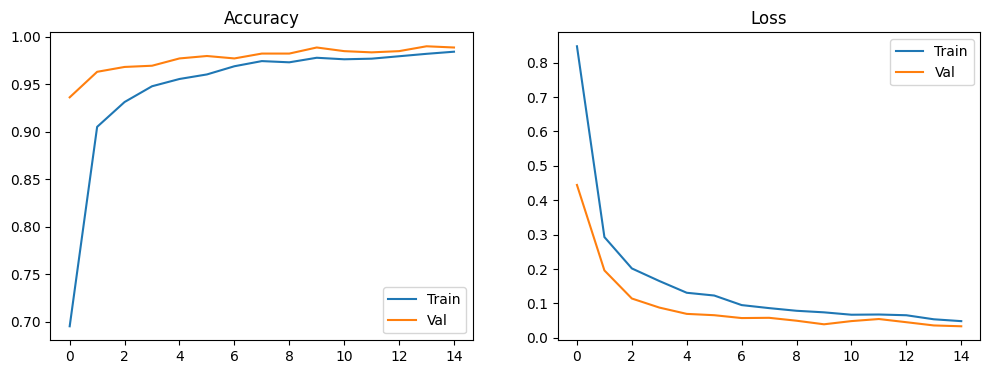

In [ ]:
def plot_history(h1, h2=None):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(h1.history['accuracy'], label='Train')
    plt.plot(h1.history['val_accuracy'], label='Val')
    if h2:
        plt.plot(
            range(len(h1.history['accuracy']),
                  len(h1.history['accuracy'])+len(h2.history['accuracy'])),
            h2.history['accuracy'], label='Fine-tune'
        )
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(h1.history['loss'], label='Train')
    plt.plot(h1.history['val_loss'], label='Val')
    if h2:
        plt.plot(
            range(len(h1.history['loss']),
                  len(h1.history['loss'])+len(h2.history['loss'])),
            h2.history['loss'], label='Fine-tune'
        )
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history)


In [ ]:
val_gen.reset()
pred = model.predict(val_gen)
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())


25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 718ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

      gadang       0.99      0.98      0.98       192
       honai       0.99      0.99      0.99       122
       joglo       0.99      0.98      0.98       144
     panjang       0.98      1.00      0.99       124
   tongkonan       0.99      0.99      0.99       200

    accuracy                           0.99       782
   macro avg       0.99      0.99      0.99       782
weighted avg       0.99      0.99      0.99       782



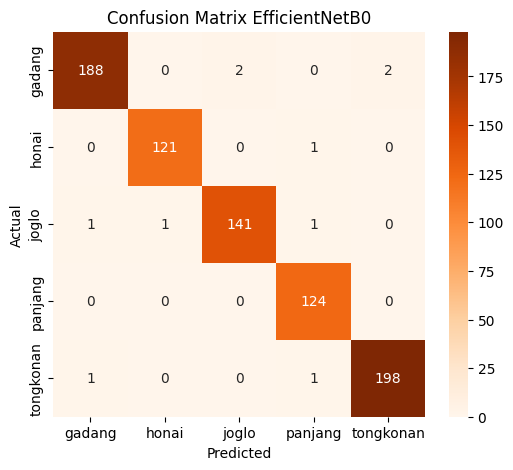

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix EfficientNetB0")
plt.show()


In [ ]:
model.save("/content/efficientnet_rumah_adat.h5")


In [ ]:
from google.colab import files
files.download("efficientnet_rumah_adat.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>